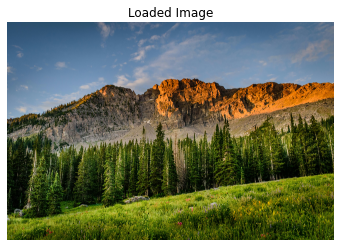

In [5]:
# Task 1: Basic Image Processing (e.g., loading, displaying, and converting an image)
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread(r'C:\Users\student\Downloads\pexels-matthew-montrone-230847-1324803.jpg')  # Replace with actual image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Loaded Image")
plt.show()


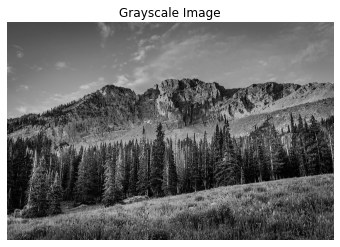

In [6]:
# Task 2: Convert Image to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()


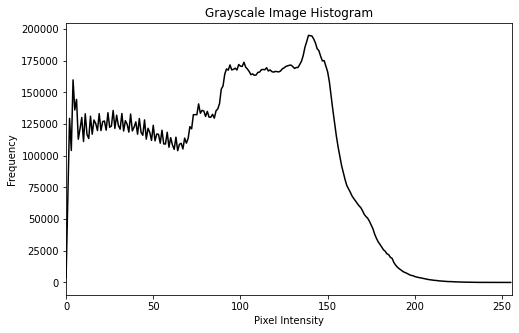

In [7]:
# Compute histogram for the grayscale image
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot histogram
plt.figure(figsize=(8, 5))
plt.plot(histogram, color='black')
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.show()


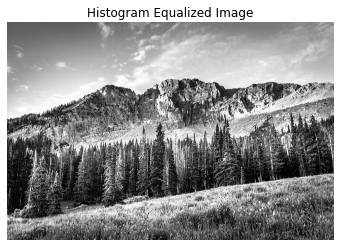

In [8]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display equalized image
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title("Histogram Equalized Image")
plt.show()


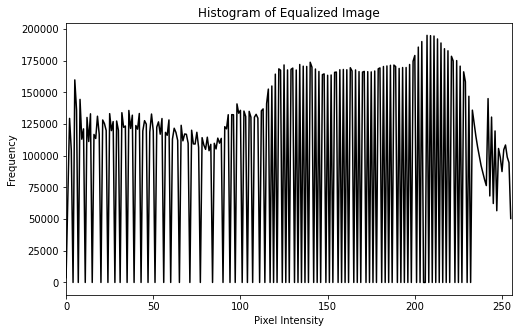

In [9]:
# Compute histogram for the equalized image
equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot histogram of the equalized image
plt.figure(figsize=(8, 5))
plt.plot(equalized_hist, color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.show()


# LAB 4

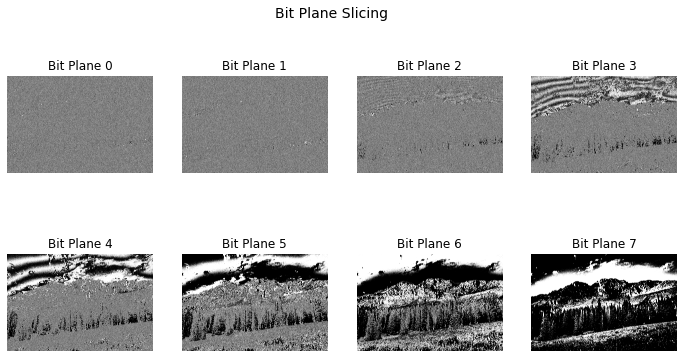

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread(r'C:\Users\student\Downloads\pexels-matthew-montrone-230847-1324803.jpg', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found!")
else:
    # Extract 8-bit planes
    bit_planes = [(image >> i) & 1 for i in range(8)]

    # Display bit planes
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle("Bit Plane Slicing", fontsize=14)

    for i in range(8):
        ax = axes[i // 4, i % 4]
        ax.imshow(bit_planes[i] * 255, cmap="gray")
        ax.set_title(f"Bit Plane {i}")
        ax.axis("off")

    plt.show()


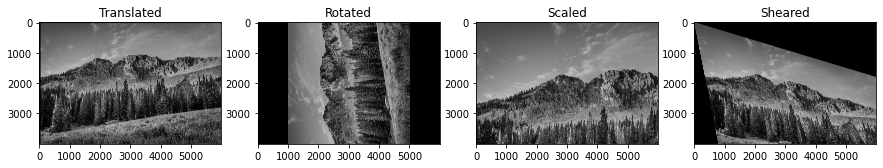

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_transformation(image, matrix):
    rows, cols = image.shape[:2]
    transformed_image = cv2.warpAffine(image, matrix, (cols, rows))
    return transformed_image

image = cv2.imread(r'C:\Users\student\Downloads\pexels-matthew-montrone-230847-1324803.jpg', 0)
rows, cols = image.shape[:2] 
# Translation
Tx, Ty = 50, 30
translation_matrix = np.float32([[1, 0, Tx], [0, 1, Ty]])
translated_image = apply_transformation(image, translation_matrix)

#Rotation
angle = 90
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
rotated_image = apply_transformation(image, rotation_matrix)

# Scaling
Sx, Sy = 1.5, 1.5
scaling_matrix = np.float32([[Sx, 0, 0], [0, Sy, 0]])
scaled_image = apply_transformation(image, scaling_matrix)

# Shearing
Shx, Shy = 0.2, 0.3
shear_matrix = np.float32([[1, Shx, 0], [Shy, 1, 0]])
sheared_image = apply_transformation(image, shear_matrix)

# Display results
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(translated_image, cmap='gray'); axes[0].set_title('Translated')
axes[1].imshow(rotated_image, cmap='gray'); axes[1].set_title('Rotated')
axes[2].imshow(scaled_image, cmap='gray'); axes[2].set_title('Scaled')
axes[3].imshow(sheared_image, cmap='gray'); axes[3].set_title('Sheared')
plt.show()


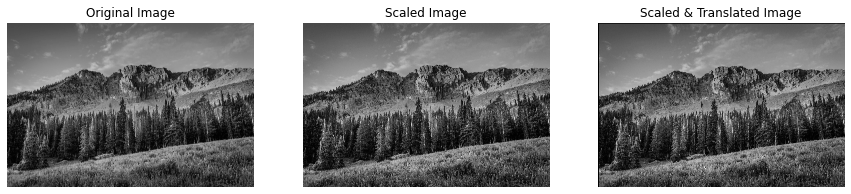

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_transformation(image, matrix, new_size):
    transformed_image = cv2.warpAffine(image, matrix, new_size)
    return transformed_image

# Load the image (make sure 'input.jpg' exists in your working directory)
image = cv2.imread(r'C:\Users\student\Downloads\pexels-matthew-montrone-230847-1324803.jpg', 0)
rows, cols = image.shape[:2]  # Get image dimensions

# Scaling Factors
Sx, Sy =4,4  # Scale by 1.5x
scaled_width, scaled_height = int(cols * Sx), int(rows * Sy)

# Scaling Transformation Matrix
scaling_matrix = np.float32([[Sx, 0, 0], [0, Sy, 0]])

# Apply Scaling
scaled_image = apply_transformation(image, scaling_matrix, (scaled_width, scaled_height))

# Translation Values
Tx, Ty = 100, 50  # Move right by 100px, down by 50px

# Translation Transformation Matrix
translation_matrix = np.float32([[1, 0, Tx], [0, 1, Ty]])

# New canvas size to fit the translated image
new_width, new_height = scaled_width + Tx, scaled_height + Ty

# Apply Translation on Scaled Image
translated_image = apply_transformation(scaled_image, translation_matrix, (new_width, new_height))

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray'); axes[0].set_title('Original Image')
axes[1].imshow(scaled_image, cmap='gray'); axes[1].set_title('Scaled Image')
axes[2].imshow(translated_image, cmap='gray'); axes[2].set_title('Scaled & Translated Image')

for ax in axes:
    ax.axis('off')

plt.show()
